In [1]:
import itertools
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/Users/pranaymitra/Documents/Credit Card Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EDA

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
genuine = len(df[df.Class==0])
fraud = len(df[df.Class==1])
fraud_percent = (fraud/(fraud+genuine))*100

print('Number of genuine transactions :', genuine)
print('Number of fraud transactions :', fraud)
print('Percentage of fraud transactions :', fraud_percent)

Number of genuine transactions : 284315
Number of fraud transactions : 492
Percentage of fraud transactions : 0.1727485630620034


The very small percentage of fraud transactions shows that the dataset is highly imbalanced. Which is generally the case with such datasets.

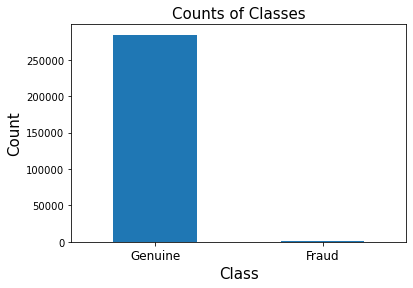

In [7]:
labels = ('Genuine','Fraud')

count = df.value_counts(df.Class,sort=True)
count.plot(kind='bar',rot=0)
plt.xticks(range(2),labels,fontsize=12)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Counts of Classes',fontsize=15)
plt.show()

Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Normalised Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount','Time'],inplace=True,axis=1)

In [9]:
x = df.drop('Class',axis=1)
y = df.Class

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 69)

print('Shape of Train set (X) :',x_train.shape)
print('Shape of Test set (X) :',x_test.shape)

Shape of Train set (X) : (199364, 29)
Shape of Test set (X) : (85443, 29)


ML Algorithms

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

Training and Evaluating

In [12]:
decision_tree.fit(x_train,y_train)
prediction_dt = decision_tree.predict(x_test)
scores_dt = decision_tree.score(x_test,y_test)*100

random_forest.fit(x_train,y_train)
prediction_rf = random_forest.predict(x_test)
scores_rf = random_forest.score(x_test,y_test)*100

In [13]:
print('The Decision Trees score is :',scores_dt)
print('The Random Forest score is :',scores_rf)

The Decision Trees score is : 99.92158515033414
The Random Forest score is : 99.96605924417447


Random Forest has slight edge over the Decision Trees.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix, recall_score, f1_score, confusion_matrix


def metrics(actuals,predictions):
    print('Accuracy :',accuracy_score(actuals, predictions))
    print('Precision :',precision_score(actuals, predictions))
    print('Recall :',recall_score(actuals, predictions))
    print('F1 Score :',f1_score(actuals, predictions))

In [15]:
confusion_matrix_dt = confusion_matrix(y_test,prediction_dt.round())
print('Confusion Matrix : Decision Trees')
print(confusion_matrix_dt)

Confusion Matrix : Decision Trees
[[85274    37]
 [   30   102]]


In [16]:
print(metrics(y_test,prediction_dt))

Accuracy : 0.9992158515033414
Precision : 0.7338129496402878
Recall : 0.7727272727272727
F1 Score : 0.7527675276752767
None


In [17]:
confusion_matrix_rf = confusion_matrix(y_test,prediction_rf.round())
print('Confusion Matrix : Random Forest')
print(confusion_matrix_rf)

Confusion Matrix : Random Forest
[[85306     5]
 [   24   108]]


In [29]:
print("Evaluation of Random Forest Model : ")

metrics(y_test,prediction_rf)

Evaluation of Random Forest Model : 
Accuracy : 0.9996605924417448
Precision : 0.9557522123893806
Recall : 0.8181818181818182
F1 Score : 0.8816326530612245


Random Forest gives a better score but this dataset is highly imbalanced with the genuine transactions amounting to 99% of the total values. So the model gives higher importance to the genuine transactions.
To counter such a problem here we use Oversampling or The Synthetic Minority Oversampling Technique, or SMOTE for short, is a method of data augmentation for the minority class. Oversampling the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Resampling Data

In [19]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(x, y)
print("Resampled shape of X: ", x_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
value_counts = Counter(y_resampled)
print(value_counts)
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size= 0.3, random_state= 69)


Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


As Random Forest had performed better we apply Random Forest to our resampled data.

In [26]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(X_train, Y_train)
predictions_resampled = rf_resampled.predict(X_test)
random_forest_score_resampled = rf_resampled.score(X_test,Y_test) * 100

In [27]:
print("Evaluation of Random Forest Model with Resampled data")

metrics(Y_test, predictions_resampled.round())

Evaluation of Random Forest Model with Resampled data
Accuracy : 0.9998534489328151
Precision : 0.9997060103249173
Recall : 1.0
F1 Score : 0.9998529835517997


Clearly, the resampled data performed much better than the imbalanced data.